# CA2 Part1: Noise Removal

## 1.Write a python program to clean up the noise of the image in Figure 1, by employing an MRF and the binary graphcuts. 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import random as rm
import math
import cv2
import random
import gco

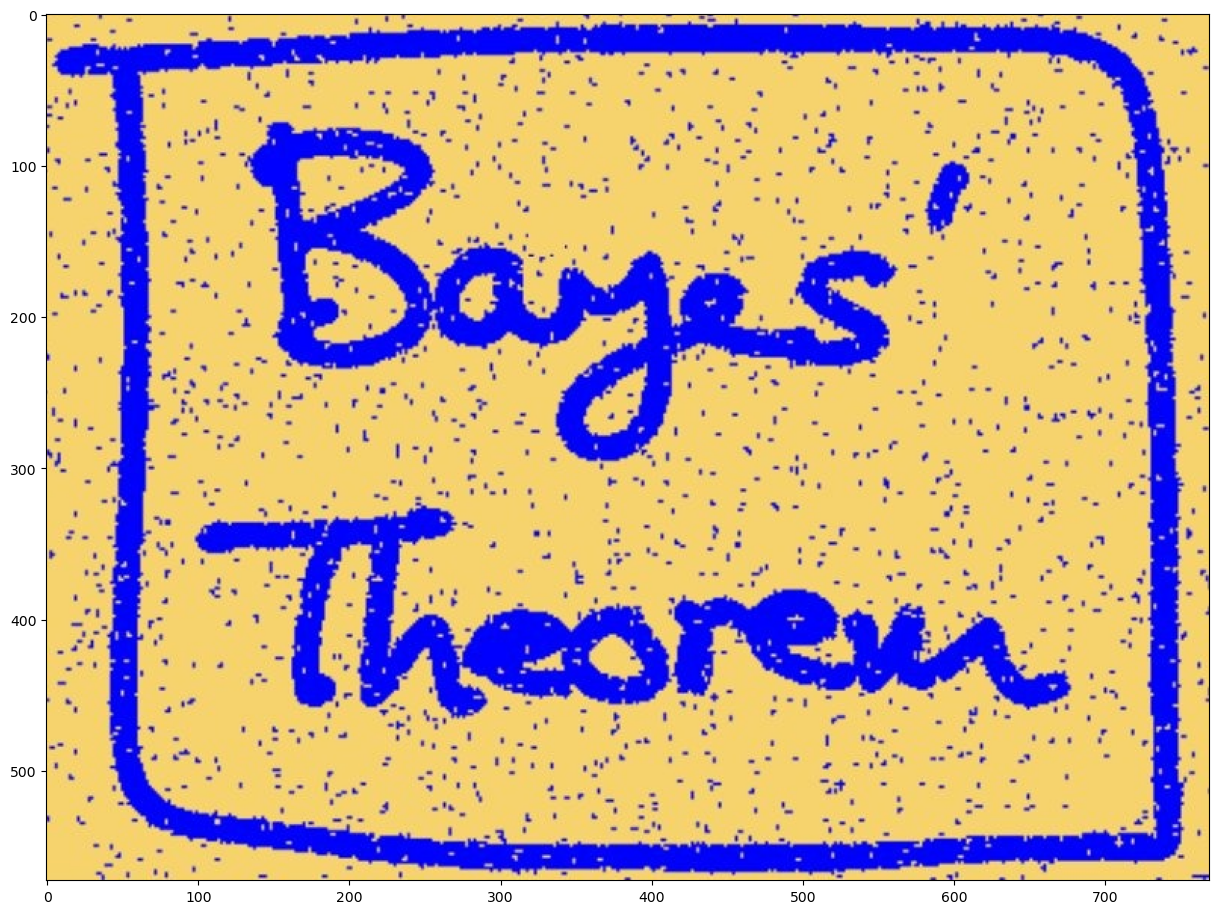

In [3]:
# foreground blue
fg = np.array([0,0,255])
# background yellow
bg = np.array([245,210,110])

im = cv2.imread('bayes_theorem.jpg',cv2.IMREAD_COLOR)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

#show the original figure
plt.figure( figsize=(15,15) )
plt.imshow(im)

In [4]:
# distance
def dis(xi,xj):
    return np.sum(np.abs(xi - xj))/3/255

In [5]:
# generate nodes
def nodes(im,lmd,fg,bg):
    
    [row,col,c] = im.shape
    unary = np.zeros([row,col,2])
    for x in range(0,col):
        for y in range(0,row):

            # pixel color
            pc = im[y,x,:]

            # data term
            fdf = dis(pc,fg)
            fdb = dis(pc,bg)

            # prior term
            # right neighbor pixel
            fpr = 1
            # below neighbor pixel
            fpb = 1

            unary[y,x,0] = fdf + lmd*(fpr + fpb)
            unary[y,x,1] = fdb + lmd*(fpr + fpb)
    
    return unary


In [6]:
# graph cut
def gcut(unary,lmd):
    [row,col,c] = unary.shape
    smooth = 1 - np.eye(2)
    labels = gco.cut_grid_graph_simple(unary, smooth*lmd, n_iter=-1)
    labels = labels.reshape(row,col)
    return labels

In [7]:
# original iamge denoise
def dimage(im,labels):
    [row,col,c] = im.shape
    dim = np.zeros(im.shape)
    for i in range(0,row):
        for j in range(0,col):

            # background
            if labels[i,j] == 1:
                dim[i,j] = bg
            elif labels[i,j] == 0:
                dim[i,j] = fg

    return dim.astype(int)

In [14]:
# lambda = 1
lmd = 1
# nodes
unary = nodes(im,lmd,fg,bg)
# graphcut
label = gcut(unary,lmd)
# image denoising
dim = dimage(im,label)

### the clean up noise figure 1 is shown here

Text(0.5, 1.0, 'denoised image with lambda = 1')

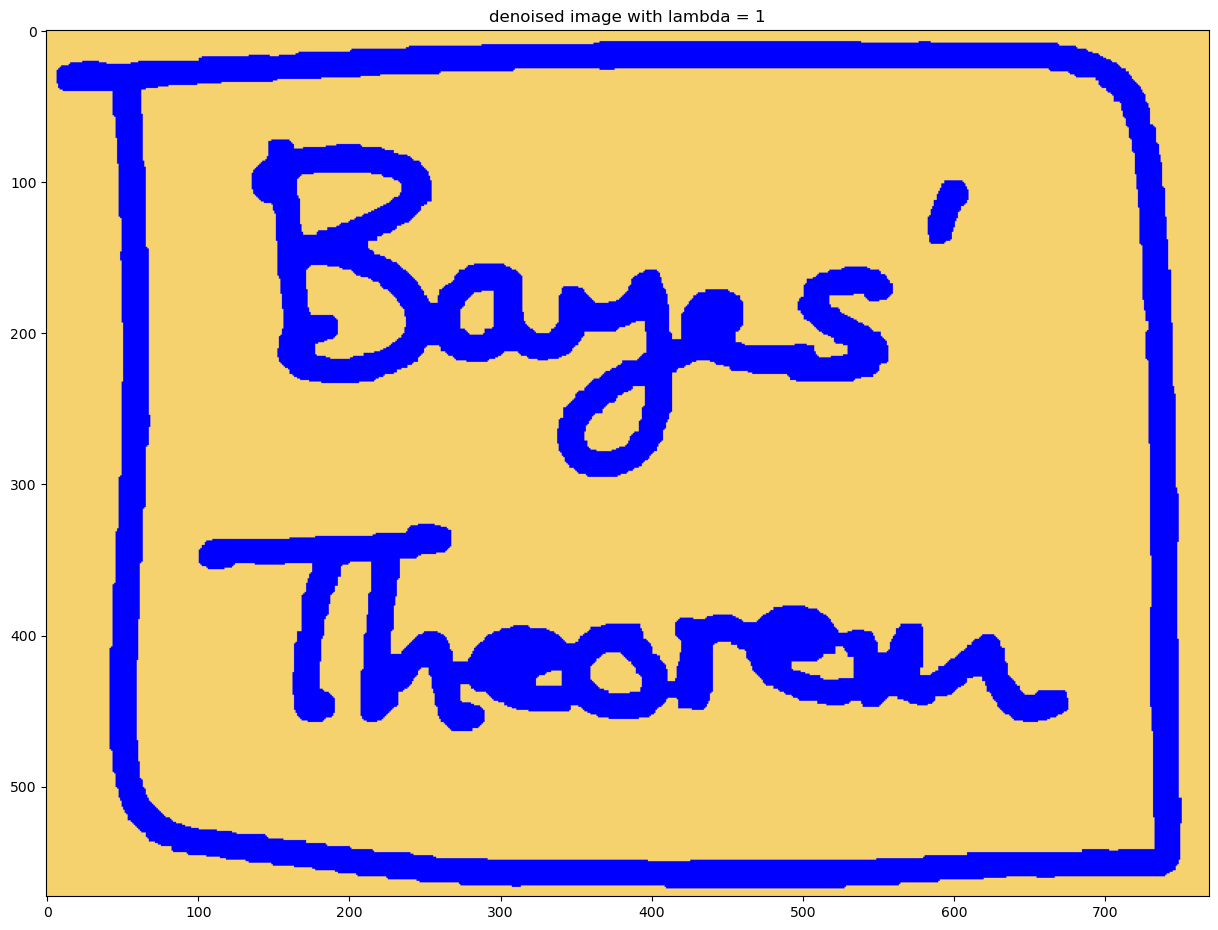

In [15]:
#show the denoised figure
plt.figure( figsize=(15,15) )
plt.imshow(dim)   
plt.title('denoised image with lambda = %d'%lmd)

## 2.Change the value of the weighting factor (lambda) of the prior term, and show some different results (due to different values of lambda). You must state the values of your lambda along with the corresponding results.

### set lambda as 5

Text(0.5, 1.0, 'denoised image with lambda = 5')

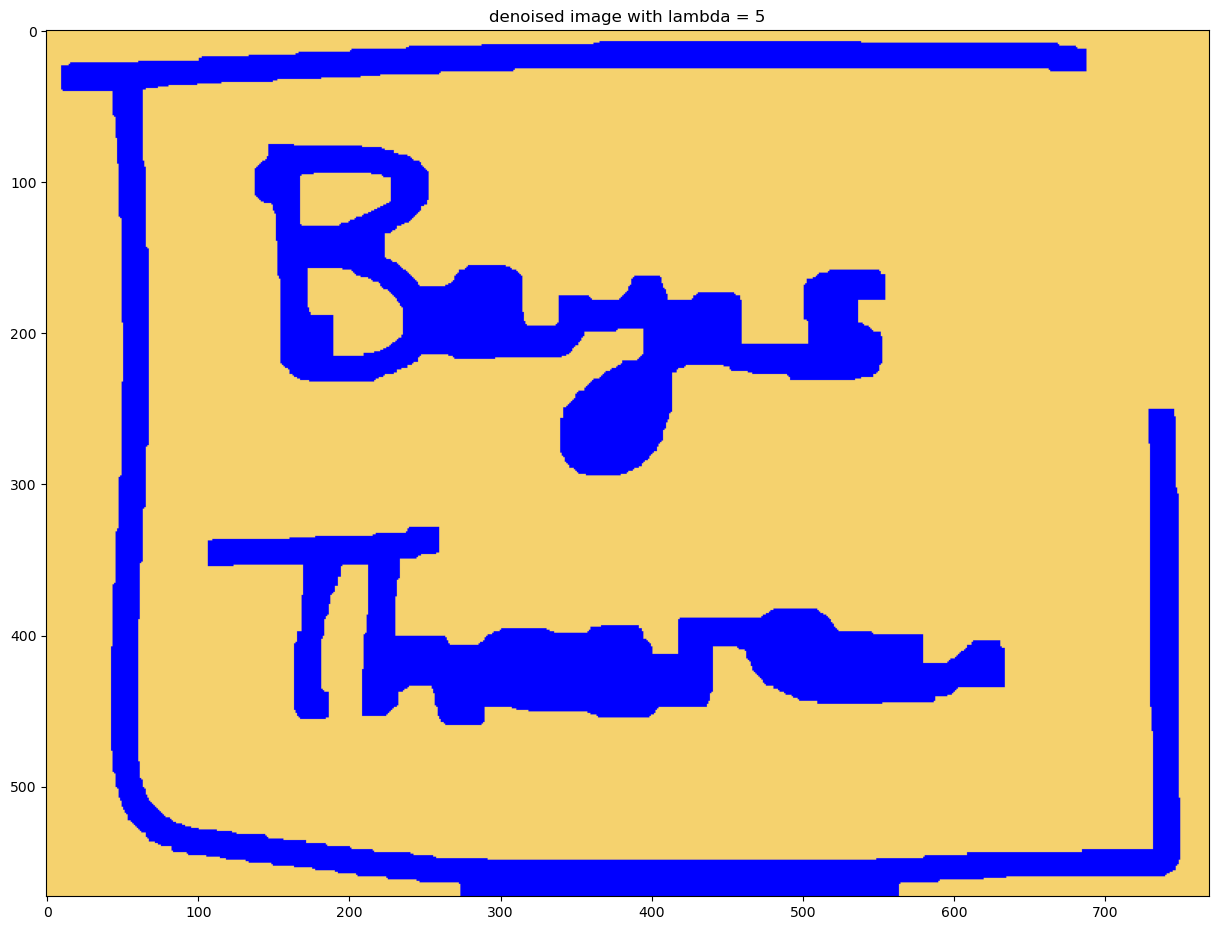

In [16]:
# lambda = 5
lmd = 5
# nodes
unary = nodes(im,lmd,fg,bg)
# graphcut
label = gcut(unary,lmd)
# image denoising
dim = dimage(im,label)

#show the denoised figure
plt.figure( figsize=(15,15) )
plt.imshow(dim)   
plt.title('denoised image with lambda = %d'%lmd)

### the cleaned figure of lambda = 5 cleans the details of the figure as well

### try set lambda as 10

Text(0.5, 1.0, 'denoised image with lambda = 10')

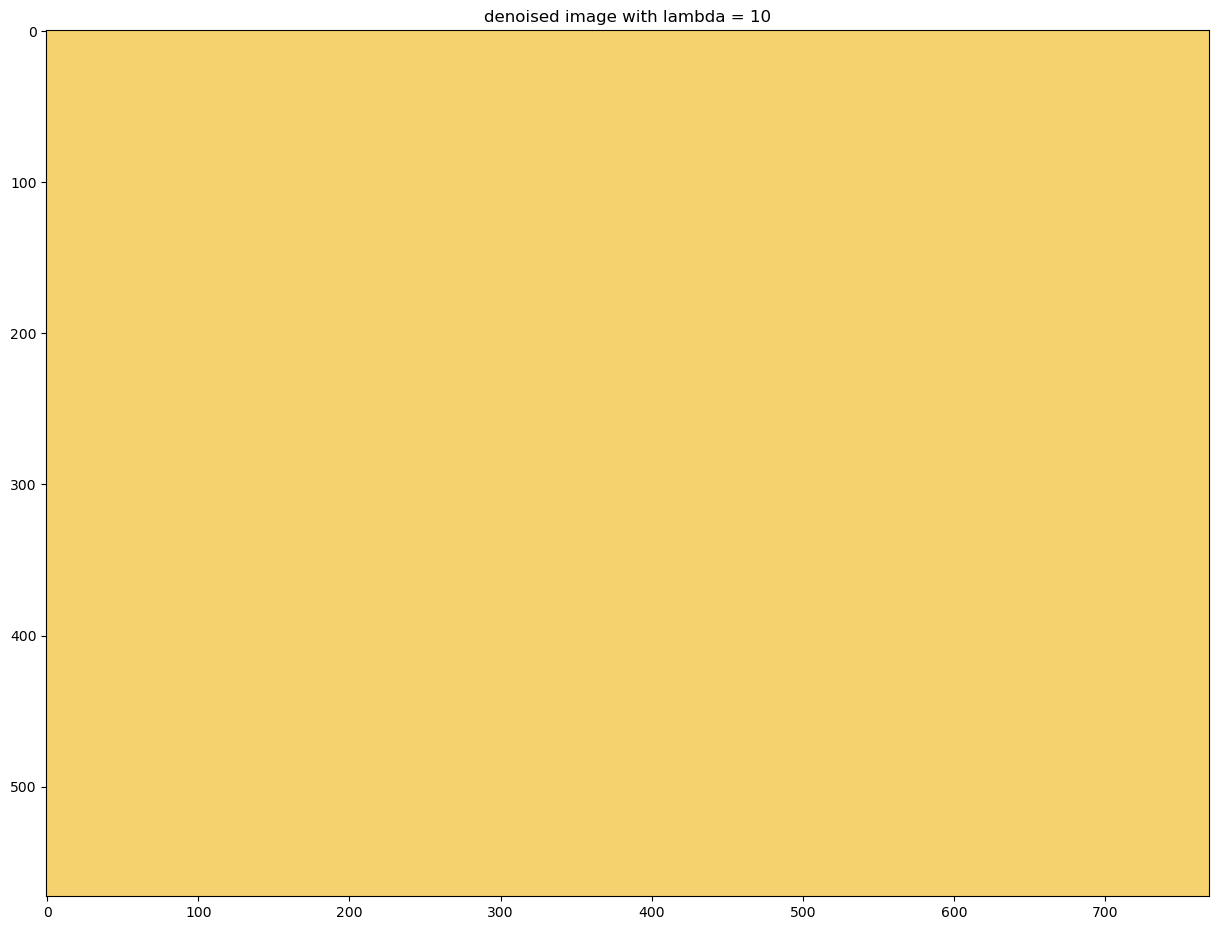

In [18]:
# lambda = 10
lmd = 10
# nodes
unary = nodes(im,lmd,fg,bg)
# graphcut
label = gcut(unary,lmd)
# image denoising
dim = dimage(im,label)

#show the denoised figure
plt.figure( figsize=(15,15) )
plt.imshow(dim)   
plt.title('denoised image with lambda = %d'%lmd)

### the whole image is the background

### set lambda as 0

Text(0.5, 1.0, 'denoised image with lambda = 0')

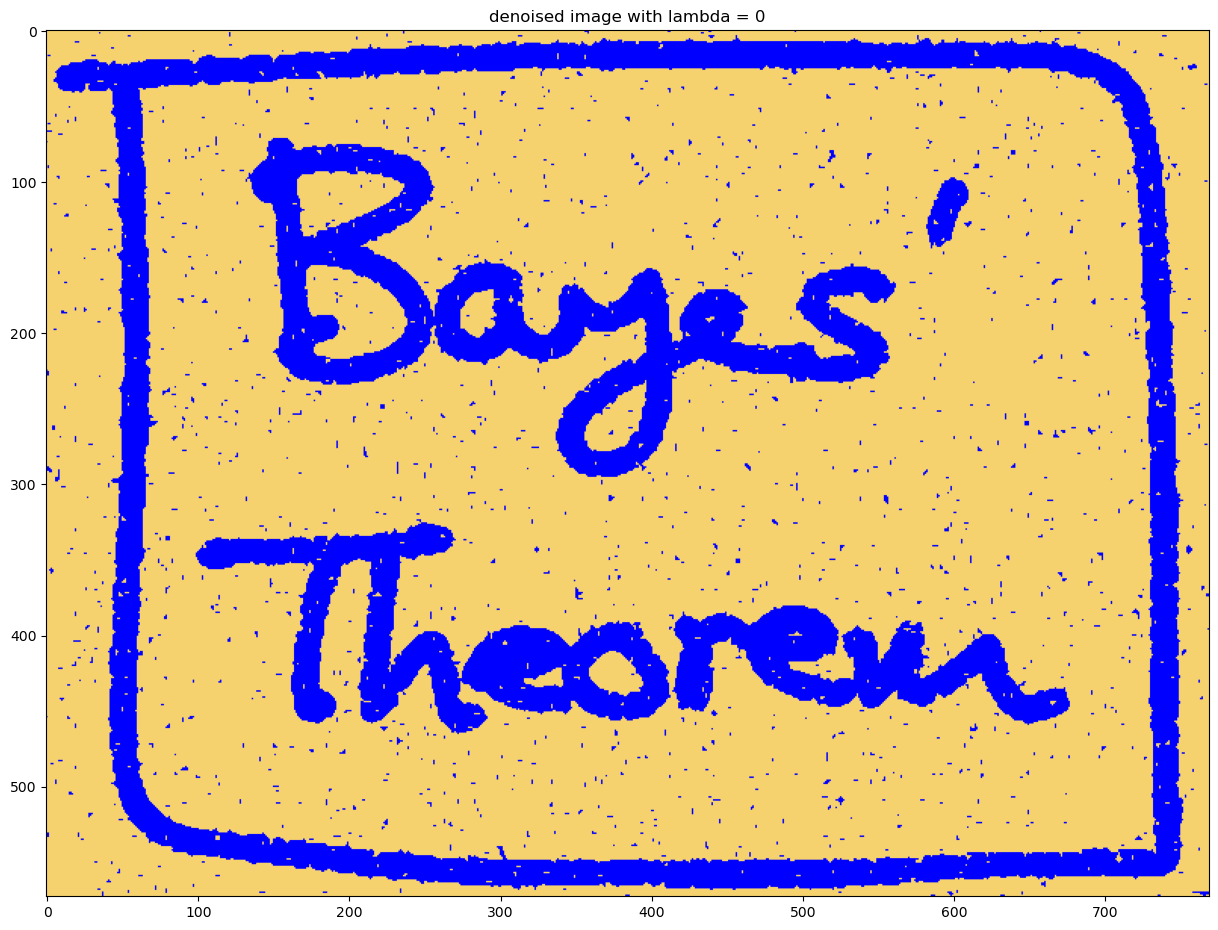

In [20]:
# lambda = 0
lmd = 0
# nodes
unary = nodes(im,lmd,fg,bg)
# graphcut
label = gcut(unary,lmd)
# image denoising
dim = dimage(im,label)

#show the denoised figure
plt.figure( figsize=(15,15) )
plt.imshow(dim)   
plt.title('denoised image with lambda = %d'%lmd)

### almost the original image

### set lambda as 0.5

Text(0.5, 1.0, 'denoised image with lambda = 0.50')

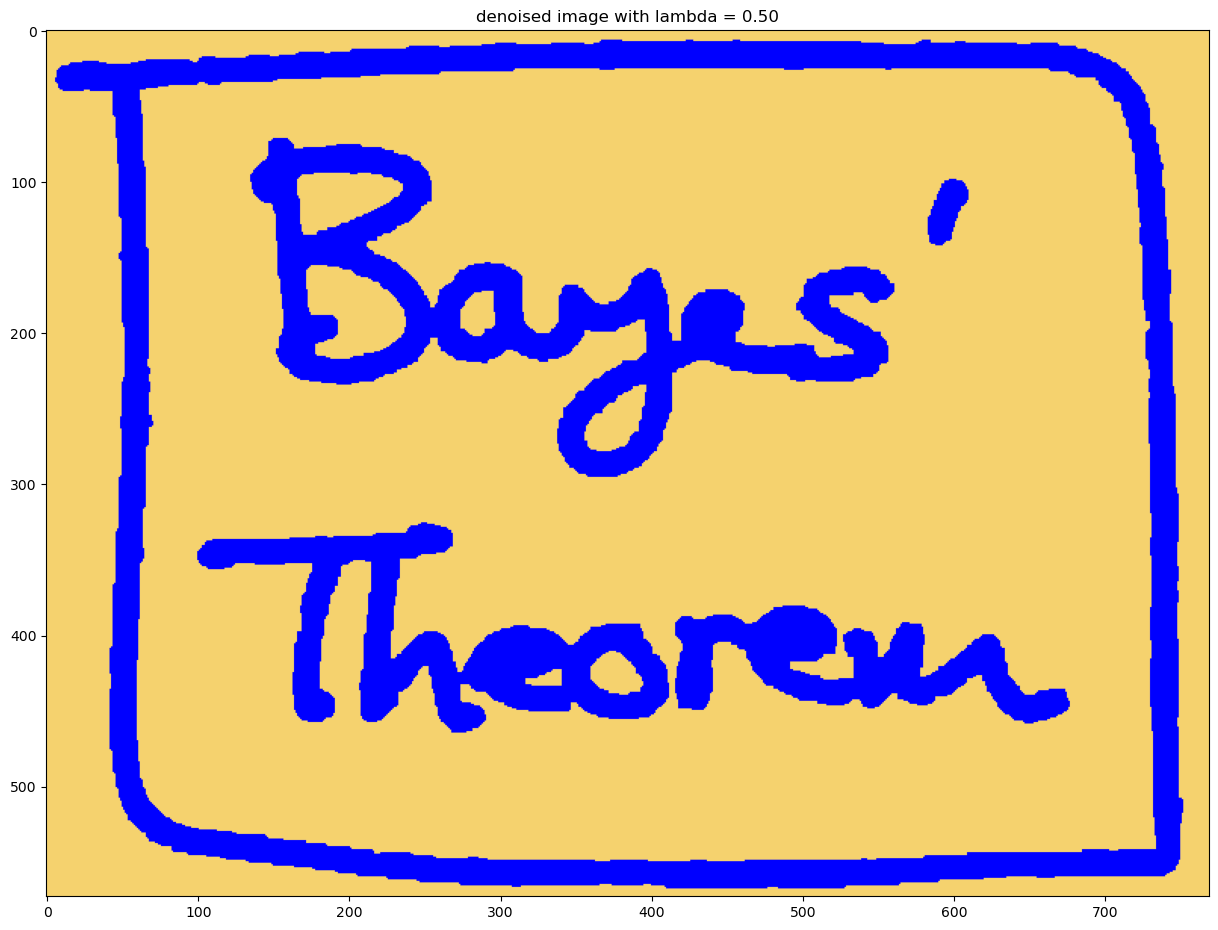

In [8]:
# lambda = 0.5
lmd = 0.5
# nodes
unary = nodes(im,lmd,fg,bg)
# graphcut
label = gcut(unary,0.5)
# image denoising
dim = dimage(im,label)

#show the denoised figure
plt.figure( figsize=(15,15) )
plt.imshow(dim)   
plt.title('denoised image with lambda = %.2f'%lmd)

### It shows that low lambda reserve the details of the edge but may also keep the noise, while large lambda clean the noise clearly but also make the image blur.